# Covid-19 Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import timedelta
from datetime import datetime as dt
import time

In [2]:
data = pd.read_csv("michigan-history.csv", encoding="ISO-8859-1",)
data.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,MI,16658.0,15666,0,992,NaN,NaN,866.0,0,...,10621967.0,0,537073.0,NaN,NaN,NaN,NaN,0,10621967.0,0
1,2021-03-06,MI,16658.0,15666,57,992,NaN,NaN,866.0,0,...,10621967.0,37232,537073.0,NaN,NaN,NaN,NaN,0,10621967.0,37232
2,2021-03-05,MI,16601.0,15610,12,991,NaN,NaN,866.0,0,...,10584735.0,46112,535084.0,NaN,NaN,NaN,NaN,0,10584735.0,46112
3,2021-03-04,MI,16589.0,15600,39,989,NaN,NaN,890.0,0,...,10538623.0,46486,532658.0,NaN,NaN,NaN,NaN,0,10538623.0,46486
4,2021-03-03,MI,16550.0,15563,6,987,NaN,NaN,882.0,0,...,10492137.0,36453,530799.0,NaN,NaN,NaN,NaN,0,10492137.0,36453


In [3]:
data.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [4]:
print("Total number of features in the dataset are:",len(data.columns))

Total number of features in the dataset are: 41


In [5]:
date = data['date']
death = data['death']
# plt.plot_date(date,death)
# mean_value=data['date'].mean()
date

0      2021-03-07
1      2021-03-06
2      2021-03-05
3      2021-03-04
4      2021-03-03
          ...    
367    2020-03-05
368    2020-03-04
369    2020-03-03
370    2020-03-02
371    2020-03-01
Name: date, Length: 372, dtype: object

In [6]:
# Taking date column in time format
date1 = data["date"].astype("datetime64")
# date = data["date"]
date1

0     2021-03-07
1     2021-03-06
2     2021-03-05
3     2021-03-04
4     2021-03-03
         ...    
367   2020-03-05
368   2020-03-04
369   2020-03-03
370   2020-03-02
371   2020-03-01
Name: date, Length: 372, dtype: datetime64[ns]

In [7]:
type(date[0])

str

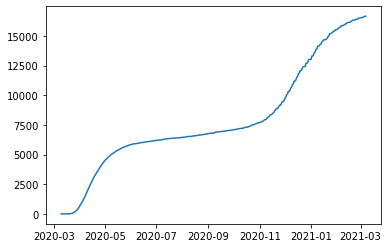

In [8]:
plt.plot(date1,death)

In [9]:
# #I will remove the rows of date which has null values in the corresponding death column.
# condition = data["death"].isnull() == False
# date_new = date[condition]

In [10]:
death_replace = death.fillna(0)
death_replace

0      16658.0
1      16658.0
2      16601.0
3      16589.0
4      16550.0
        ...   
367        0.0
368        0.0
369        0.0
370        0.0
371        0.0
Name: death, Length: 372, dtype: float64

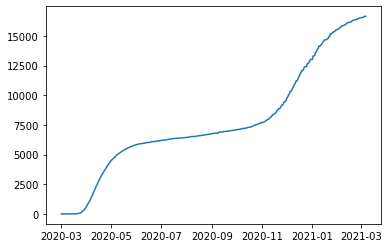

In [11]:
plt.plot(date1,death_replace)
# print(type(date))
# print(type(death_replace))

In [12]:
data = pd.read_csv("michigan-history.csv", encoding="ISO-8859-1",)
list1=[]
for i in range(1,600):
    x = pd.to_datetime(date[0]) + timedelta(days=i)
    timestamp = int(time.mktime(x.timetuple()))
#     day = np.datetime64(x)    
#     list1.append(day)
    dt_obj = dt.fromtimestamp(timestamp)#datetime object
    list1.append(dt_obj.date())
#     print(type(dt_obj))
    
    
df = pd.DataFrame (list1, columns = ['date'])
data = data.append(df,ignore_index=True)
data



,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,MI,16658.0,15666.0,0.0,992.0,NaN,NaN,866.0,0.0,...,10621967.0,0.0,537073.0,NaN,NaN,NaN,NaN,0.0,10621967.0,0.0
1,2021-03-06,MI,16658.0,15666.0,57.0,992.0,NaN,NaN,866.0,0.0,...,10621967.0,37232.0,537073.0,NaN,NaN,NaN,NaN,0.0,10621967.0,37232.0
2,2021-03-05,MI,16601.0,15610.0,12.0,991.0,NaN,NaN,866.0,0.0,...,10584735.0,46112.0,535084.0,NaN,NaN,NaN,NaN,0.0,10584735.0,46112.0
3,2021-03-04,MI,16589.0,15600.0,39.0,989.0,NaN,NaN,890.0,0.0,...,10538623.0,46486.0,532658.0,NaN,NaN,NaN,NaN,0.0,10538623.0,46486.0
4,2021-03-03,MI,16550.0,15563.0,6.0,987.0,NaN,NaN,882.0,0.0,...,10492137.0,36453.0,530799.0,NaN,NaN,NaN,NaN,0.0,10492137.0,36453.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2022-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,2022-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,2022-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969,2022-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
date2 = data["date"].astype("datetime64")
date2

0     2021-03-07
1     2021-03-06
2     2021-03-05
3     2021-03-04
4     2021-03-03
         ...    
966   2022-10-23
967   2022-10-24
968   2022-10-25
969   2022-10-26
970   2022-10-27
Name: date, Length: 971, dtype: datetime64[ns]

In [14]:
date1 = date1.astype("datetime64")
date1

0     2021-03-07
1     2021-03-06
2     2021-03-05
3     2021-03-04
4     2021-03-03
         ...    
367   2020-03-05
368   2020-03-04
369   2020-03-03
370   2020-03-02
371   2020-03-01
Name: date, Length: 372, dtype: datetime64[ns]

In [15]:
date1_toordinal = date1.apply(lambda x: x.toordinal())
date1_toordinal

0      737856
1      737855
2      737854
3      737853
4      737852
        ...  
367    737489
368    737488
369    737487
370    737486
371    737485
Name: date, Length: 372, dtype: int64

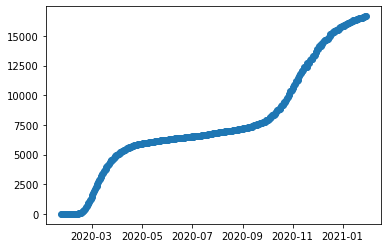

In [16]:
plt.plot_date(date1_toordinal- 719200,death_replace)

In [17]:
date2 = date2.apply(lambda x: x.toordinal())
date2


0      737856
1      737855
2      737854
3      737853
4      737852
        ...  
966    738451
967    738452
968    738453
969    738454
970    738455
Name: date, Length: 971, dtype: int64

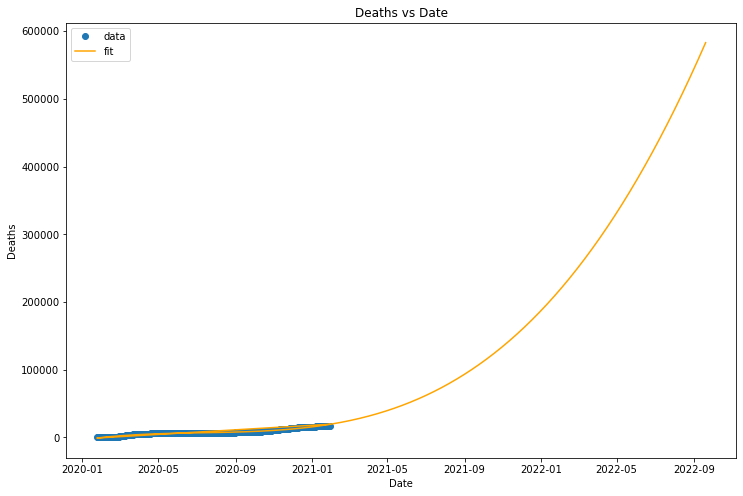

In [43]:
poly_parameters = np.polyfit(date1_toordinal, death_replace, 3)
my_poly_function = np.poly1d(poly_parameters)
expected_y_poly = my_poly_function(date2)

plt.figure(figsize=(12,8))
plt.plot_date(date1_toordinal- 719200, death_replace, label = "data")
plt.plot(date2- 719200, expected_y_poly, color = "orange", label = "fit")

plt.legend()
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title("Deaths vs Date")
plt.show()

## Agent Based Model for Covid

In [19]:
import random as rand
import random as random
from IPython.display import display, clear_output

In [20]:
# Moore Neighborhood
def getNeighborValues(i, j, board):
    '''
    Function to get the **values** for the neighborhood of a given
    agent at [i,j]
    '''
    neighborhood_indices = [(i-1,j),(i,j-1),(i+1,j),(i,j+1),(i-1,j-1),(i-1,j+1),(i+1,j-1),(i+1,j+1)]
    
    ## We want to go through all of the indices and store the
    ## values in those locations as long as they are _on the board_
    neighborhood_values = []
    
    for index in neighborhood_indices:
        if onBoard(index[0], index[1], board):
            neighborhood_values.append(board[index[0], index[1]])
    
    return neighborhood_values

# getNeighborValues(9,9,arr)#only neigbour values

In [21]:
def visualize(arr):
    plt.imshow(arr,cmap="Blues")

In [22]:
def set_board(width=100,height=100,density=0.5):
    
    game_board = np.zeros((height,width,))
    
    for i in range(game_board.shape[0]):
        for j in range(game_board.shape[1]):
            if random.uniform(0,1) < density:
                game_board[i,j] = 1

    
    return game_board

In [23]:
def spreadInfection(board):
    height, width = board.shape
    height_quarters = int(height/4)
    width_quarters = int(width/4)
    
    starting_middle_height_index = height_quarters
    ending_middle_height_index = 3*height_quarters
    
    starting_middle_width_index = width_quarters
    ending_middle_width_index = 3*width_quarters
    
    found_starting_point = False
    ##If the people density is low enough, we might not have
    ##an individual in this middle region. If that's the case, we
    ##are going to make a slight modification and just 
    ##place someone on the board who does know the information
    # 1 is depicting people and 2 the person with infection
    if np.all(board[starting_middle_height_index:ending_middle_height_index, starting_middle_width_index:ending_middle_width_index] == 0):
        i = random.randint(starting_middle_height_index, ending_middle_height_index)
        j = random.randint(starting_middle_width_index, ending_middle_width_index)
        board[i,j] = 2
        found_starting_point = True
    while not found_starting_point:
        i = random.randint(starting_middle_height_index, ending_middle_height_index)
        j = random.randint(starting_middle_width_index, ending_middle_width_index)
        if board[i,j] == 1:
            found_starting_point = True
            board[i, j] = 2 
            
    return board


In [24]:
def onBoard(i, j, board):
    '''
    Checks to see if the index [i,j] is a valid index for this array.
    '''
    if i <= board.shape[0]-1 and i >= 0 and j <= board.shape[1]-1 and j >= 0:
        return True
    else:
        return False

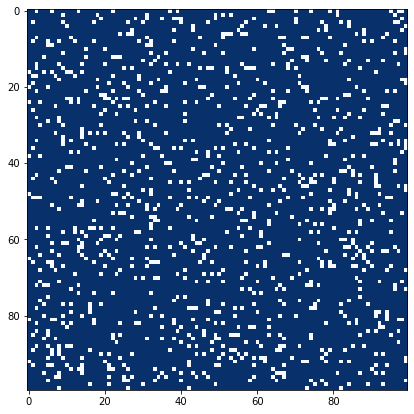

Completed in 75 iterations


In [25]:
ALPHA = 1.0

def anim():
    fig = plt.figure(figsize = (12,7))
    visualize(city) 
    time.sleep(0.1)
    clear_output(wait=True) 
    display(fig)           
    fig.clear()         
    plt.close();
    
city = set_board(100,100,0.9)
spreadInfection(city)
a=0
while(True):
    a += 1
    new_city = city.copy()
    for i in range(city.shape[0]):
        for j in range(city.shape[1]):
            if city[i][j] == 1:         
                neighborhood_values = getNeighborValues(i,j,city) 
                for values in neighborhood_values:

                    if values == 2 and random.uniform(0,1) < ALPHA:  
                        new_city[i][j] = 2        

    if np.all(new_city==city) :
        print("Completed in {} iterations".format(a))
        break
    else:
        city = new_city
     
    anim()

In [26]:
#Calculating density with Percentage of people that has infection in the end.
list_people_with_infection = []

for density in np.arange(0.05,1.01,0.05):
    city = set_board(100,100,density)
    spreadInfection(city)
    while(True):
        new_city = city.copy()
        for i in range(city.shape[0]):
            for j in range(city.shape[1]):
                if city[i][j] == 1:         
                    neighborhood_values = getNeighborValues(i,j,city) 
                    for values in neighborhood_values:

                        if values == 2:  
                            new_city[i][j] = 2        

        if np.array_equal(new_city,city) :
            break
        else:
            city = new_city
#         anim()
        
    counting_2 = 0
    for i in range(city.shape[0]):
        for j in range(city.shape[1]):
            if city[i][j] == 2:
                counting_2 += 1
    counting_1 = 0
    for i in range(city.shape[0]):
        for j in range(city.shape[1]):
            if city[i][j] == 1:
                counting_1 += 1            
                                      
    list_people_with_infection.append((counting_2/(counting_1+counting_2))*100)

Text(0.5, 1.0, '% of the people who had infection at the end of the simulation vs Density')

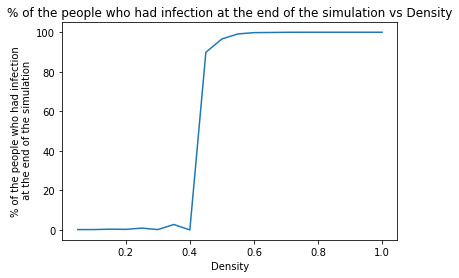

In [45]:
density_list=[]
for density in np.arange(0.05,1.01,0.05):
    density_list.append(density)
plt.plot(density_list,list_people_with_infection)
plt.xlabel("Density")
plt.ylabel("% of the people who had infection\n at the end of the simulation")
plt.title("% of the people who had infection at the end of the simulation vs Density")